In [29]:
import numpy as np
import matplotlib.pyplot as plt


## 1. Création du signal

on cherche à modéliser un carré pour ce la on va prendre 100 points

### 1.1 Carré

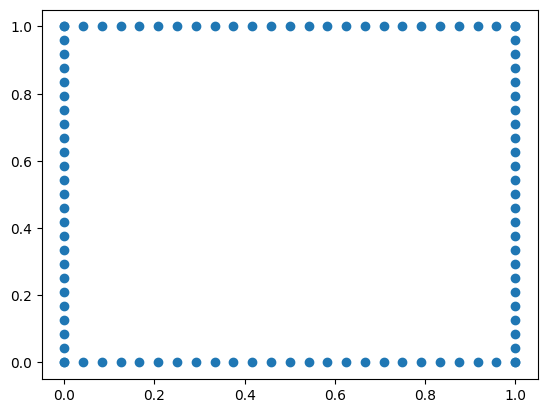

In [30]:
def carré(n,long):
    X=[]
    Y=[]
    x=np.linspace(0,long,n//4)
    for i in x:
        X.append(i)
        Y.append(0)
    for j in x:
        X.append(long)
        Y.append(j)
    for i in x[::-1]:
        X.append(i)
        Y.append(long)
    for j in x[::-1]:
        X.append(0)
        Y.append(j)
    return X,Y


X,Y=carré(100,1)

plt.scatter(X,Y)


### 1.2 Passage en complexe

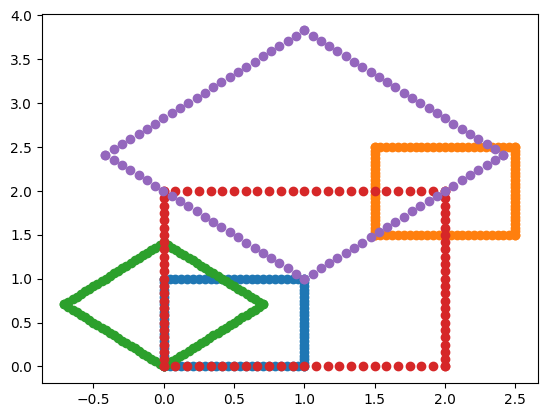

In [36]:
def complexification(X,Y):
    L=[]
    for x in range(len(X)):
        L.append(X[x]+1j*Y[x])
    return L

L=complexification(X,Y)

Ltranslat=[i+1.5+1.5j for i in L]
Lrota=[i*np.exp(np.pi/4*1j) for i in L]
L2=[2*i for i in L]
Ltotal=[2*i*np.exp(np.pi/4*1j)+1+1j for i in L]


#print(L)

Xtranslat=[z.real for z in Ltranslat]
Ytranslat=[z.imag for z in Ltranslat]

Xrota=[z.real for z in Lrota]
Yrota=[z.imag for z in Lrota]

X2=[z.real for z in L2]
Y2=[z.imag for z in L2]

Xtotal=[z.real for z in Ltotal]
Ytotal=[z.imag for z in Ltotal]

plt.figure()
plt.scatter(X,Y)
plt.scatter(Xtranslat,Ytranslat)
plt.scatter(Xrota,Yrota)
plt.scatter(X2,Y2)
plt.scatter(Xtotal,Ytotal)



### 1.3 Transformation signal

## 2. Décomposition de Fourier

In [41]:
from scipy.fft import fft, ifft

def fourier_decompo(Liste_complexes,f):
    n=len(Liste_complexes)
    vect_exp=[[np.exp(-2*np.pi*1j*x*f/n) for x in range(n)]]
    L=np.array(Liste_complexes)
    return np.sum(vect_exp*L.T)

list_fourier=[fourier_decompo(L,x) for x in range(len(L))]
#print(list_fourrier)

#print(fft(L))
len(list_fourier)


100

In [42]:
def fourier_descript(Liste_complexes):
    # Transformée de Fourier
    fL=fft(L)
    # Calcul des c_i
    cL=np.sqrt(fL.real**2+fL.imag**2)
    # on enleve la premiere valeur
    inter=cL[1:]
    # on divise par la premiere valeur et on enleve le 1
    sSp=(inter/inter[0])[1:]
    # on prend un seuil pour éviter d'avoir des valeurs en 10**-10
    threshold = 1e-10
    # Fonction arrondi
    def round_complex(z):
        return round(z.real, 5) + round(z.imag, 5) * 1j
    return [round_complex(num) if abs(num) >= threshold else 0 for num in sSp]

# Calcul des Fourier Descriptors
D=fourier_descript(L)
Dtranslat=fourier_descript(Ltranslat)
Drota=fourier_descript(Lrota)
D2=fourier_descript(L2)
Dtotal=fourier_descript(Ltotal)

features=[D,Dtranslat,Drota,D2,Dtotal]

def differences(D1,D2):
    return sum([abs(D1[i]-D1[i])**2 for i in range(len(D1))])

for k in range(len(features)):
    print("différences entre les features : ",differences(features[0],features[k]))

différences entre les features :  0.0
différences entre les features :  0.0
différences entre les features :  0.0
différences entre les features :  0.0
différences entre les features :  0.0


### 3. $TF^{-1}$

In [43]:
def tf_1(coeff_fouriers,x):
    k=len(coeff_fouriers)
    n=len(coeff_fouriers)
    vect_exp=[[np.exp(-2*np.pi*1j*x*f/n) for f in range(k)]]
    L=np.array(coeff_fouriers[0:k])
    return 1/n*np.sum(vect_exp*L.T)
    
    



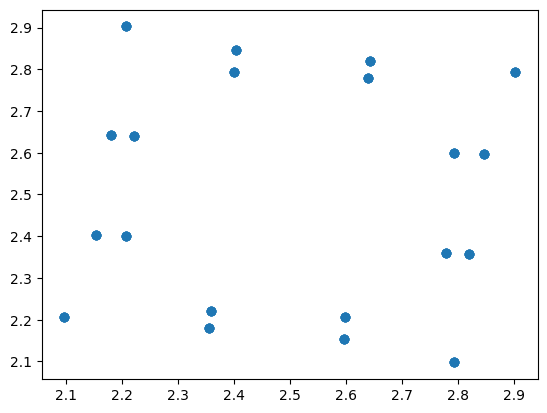

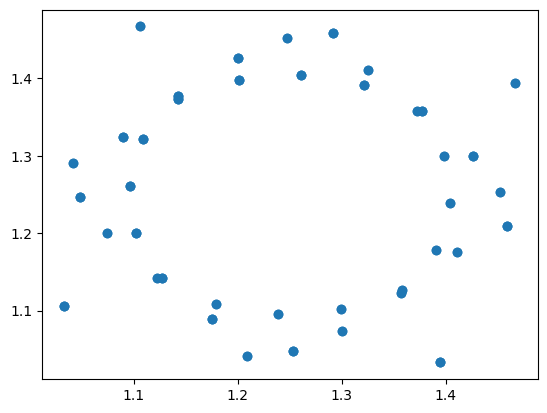

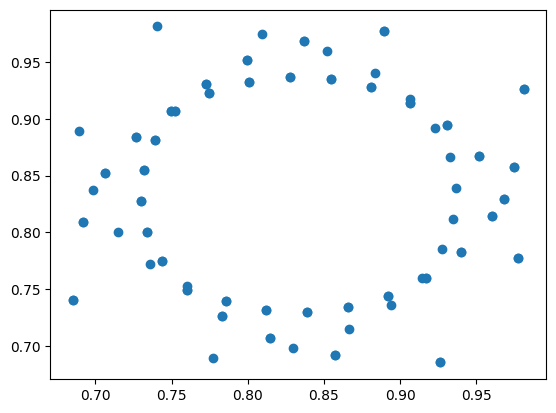

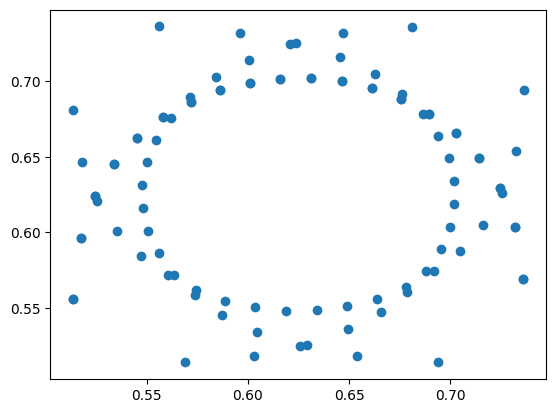

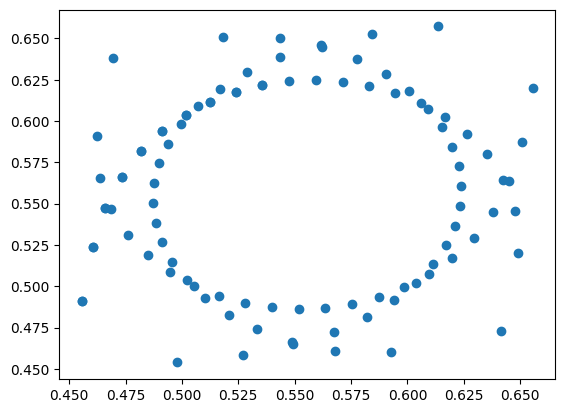

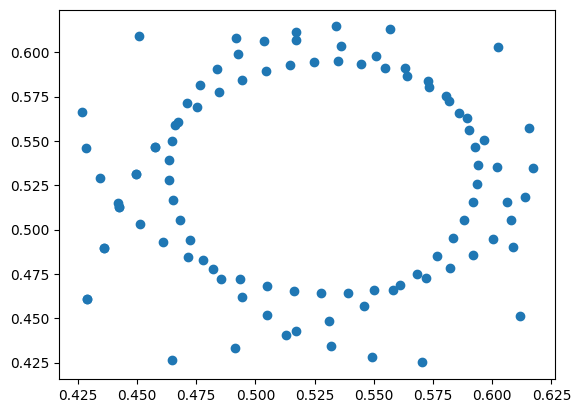

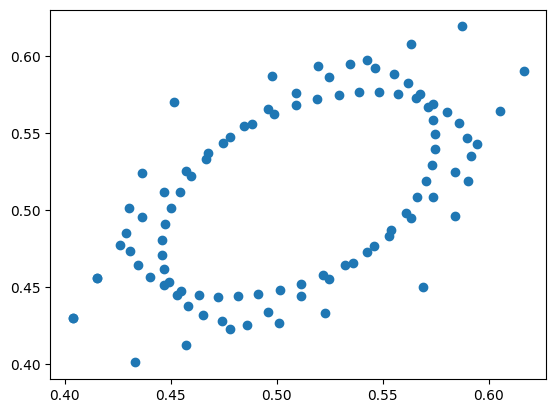

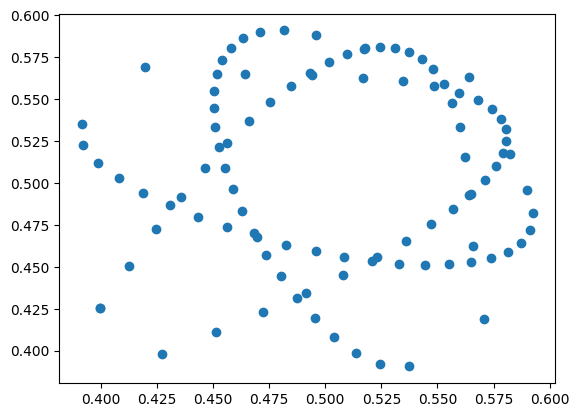

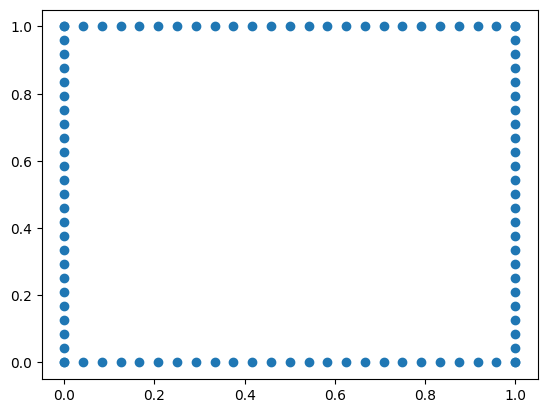

In [44]:
for n in [80,60,40,20,10,5,2,1,0]:
    
    trunc_four=list_fourier[:(len(L)-n)]
    
    long=len(L)
    s_reconstruit=[tf_1(trunc_four,x) for x in range(long)]

    X=[x.real for x in s_reconstruit]
    Y=[y.imag for y in s_reconstruit]

    plt.scatter(X,Y)
    plt.show()
    